In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d6e2c44634d6defc6585134a906b7db


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | cortland
Processing Record 3 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 13 | tuatapere
Processing Record 5 of Set 13 | ilulissat
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 13 | creel
Processing Record 9 of Set 13 | jacqueville
Processing Record 10 of Set 13 | teguldet
Processing Record 11 of Set 13 | cherskiy
Processing Record 12 of Set 13 | quchan
Processing Record 13 of Set 13 | bhatkal
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | port elizabeth
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | cabatuan
Processing Record 19 of Set 13 | grand gaube
Processing Record 20 of Set 13 | saint george
Processing Record 21 of Set 13 | cape town
Pro

Processing Record 34 of Set 16 | galiwinku
City not found. Skipping...
Processing Record 35 of Set 16 | manitouwadge
Processing Record 36 of Set 16 | cidreira
Processing Record 37 of Set 16 | verkhnyaya inta
Processing Record 38 of Set 16 | sawakin
Processing Record 39 of Set 16 | codrington
Processing Record 40 of Set 16 | isangel
Processing Record 41 of Set 16 | mujiayingzi
Processing Record 42 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 16 | niquero
Processing Record 44 of Set 16 | nelson bay
Processing Record 45 of Set 16 | lasa
Processing Record 46 of Set 16 | dharchula
Processing Record 47 of Set 16 | riohacha
Processing Record 48 of Set 16 | kampot
Processing Record 49 of Set 16 | mahebourg
Processing Record 50 of Set 16 | merauke
Processing Record 1 of Set 17 | talnakh
Processing Record 2 of Set 17 | kudahuvadhoo
Processing Record 3 of Set 17 | weligama
Processing Record 4 of Set 17 | longyearbyen
Processing Record 5 of Set 17 | ancud
Processing 

Processing Record 14 of Set 20 | alofi
Processing Record 15 of Set 20 | kentau
Processing Record 16 of Set 20 | nisia floresta
Processing Record 17 of Set 20 | guaruja
Processing Record 18 of Set 20 | sakakah
Processing Record 19 of Set 20 | salinopolis
Processing Record 20 of Set 20 | lazaro cardenas
Processing Record 21 of Set 20 | mokrous
Processing Record 22 of Set 20 | north bend
Processing Record 23 of Set 20 | hihifo
City not found. Skipping...
Processing Record 24 of Set 20 | guerrero negro
Processing Record 25 of Set 20 | yumen
Processing Record 26 of Set 20 | panguna
Processing Record 27 of Set 20 | maneadero
Processing Record 28 of Set 20 | shache
Processing Record 29 of Set 20 | maningrida
Processing Record 30 of Set 20 | wattegama
Processing Record 31 of Set 20 | khani
Processing Record 32 of Set 20 | ornskoldsvik
Processing Record 33 of Set 20 | iqaluit
Processing Record 34 of Set 20 | verkhoyansk
Processing Record 35 of Set 20 | nizhneyansk
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 2 of Set 24 | itanhaem
Processing Record 3 of Set 24 | toba
Processing Record 4 of Set 24 | tra vinh
Processing Record 5 of Set 24 | swan hill
Processing Record 6 of Set 24 | ahuimanu
Processing Record 7 of Set 24 | smithers
Processing Record 8 of Set 24 | mayumba
Processing Record 9 of Set 24 | maxixe
Processing Record 10 of Set 24 | lima
Processing Record 11 of Set 24 | rio verde de mato grosso
Processing Record 12 of Set 24 | una
Processing Record 13 of Set 24 | cockburn town
Processing Record 14 of Set 24 | omboue
Processing Record 15 of Set 24 | batemans bay
Processing Record 16 of Set 24 | cariati
Processing Record 17 of Set 24 | beringovskiy
Processing Record 18 of Set 24 | halifax
Processing Record 19 of Set 24 | elko
Processing Record 20 of Set 24 | choya
Processing Record 21 of Set 24 | zhaotong
Processing Record 22 of Set 24 | santa fe
Processing Record 23 of Set 24 | zhuzhou
Processing Record 24 of Set 24 | anadyr
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-3.23,100,53,3.76,CA,2021-04-23 07:45:05
1,Rikitea,-23.1203,-134.9692,77.74,79,37,18.39,PF,2021-04-23 07:45:06
2,College,64.8569,-147.8028,48.20,52,1,8.05,US,2021-04-23 07:45:06
3,Mount Gambier,-37.8333,140.7667,57.20,72,90,6.91,AU,2021-04-23 07:45:07
4,Jamestown,42.0970,-79.2353,27.00,93,1,18.41,US,2021-04-23 07:45:07
5,Saint Anthony,45.0205,-93.2180,51.80,46,90,4.61,US,2021-04-23 07:45:08
6,Kodiak,57.7900,-152.4072,41.00,93,90,4.61,US,2021-04-23 07:43:51
7,Brae,60.3964,-1.3530,44.60,70,20,8.05,GB,2021-04-23 07:45:08
8,Bambous Virieux,-20.3428,57.7575,82.00,83,75,5.75,MU,2021-04-23 07:45:09
9,Khatanga,71.9667,102.5000,33.22,99,100,16.78,RU,2021-04-23 07:45:09


In [20]:
new_column_order = ["city", "country", "date","lat","lng","Max temp","Humidity","Cloudiness","Wind speed",]
df =df[new_column_order]

NameError: name 'df' is not defined

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619207885.7516434

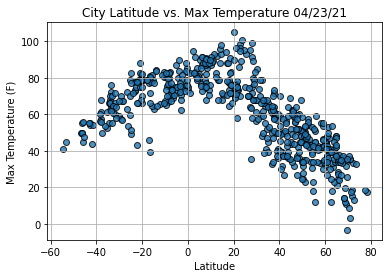

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

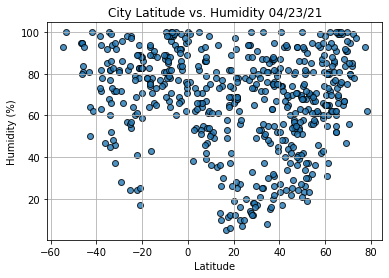

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

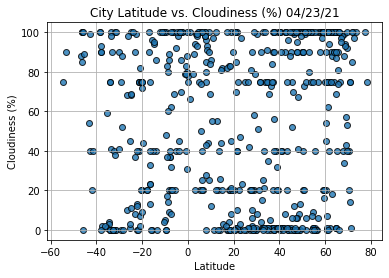

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

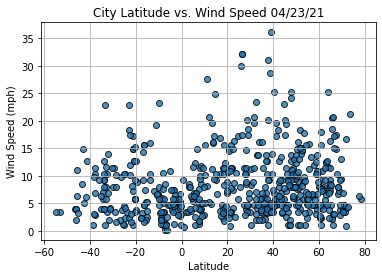

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

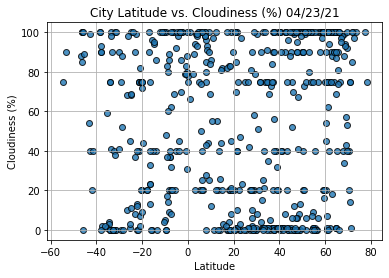

In [76]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

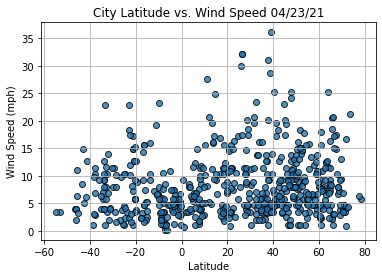

In [77]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [78]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [79]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [10]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

NameError: name 'linregress' is not defined